In [1]:
import requests
import pandas as pd
import numpy as np
import main

In [2]:
# url = 'https://charts-spotify-com-service.spotify.com/public/v0/charts'
# response = requests.get(url)
# chart = []
# for entry in response.json()['chartEntryViewResponses'][0]['entries']:
#     chart.append({
#         "Rank": entry['chartEntryData']['currentRank'],
#         "Artist": ', '.join([artist['name'] for artist in entry['trackMetadata']['artists']]),
#         "TrackName": entry['trackMetadata']['trackName']
#     })
# df = pd.DataFrame(chart)
#print(df.to_string(index=False))

In [3]:
# playlist_df = main.get_playlist()

# #playlist_df = main.get_5_songs(playlist_df)
# playlist_df

,track_id,track_name,album_name,album_id,popular
0,2YpeDb67231RjR0MgVLzsG,Old Town Road - Remix,7 EP,4IRiXE5NROxknUSAUSjMoO,True
1,2Fxmhks0bxGSBdJ92vM42m,bad guy,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",0S0KGZnfBGSIssfF54WSJh,True
2,6v3KW9xbzN5yKLt9YKDYA2,Señorita,Shawn Mendes (Deluxe),0xzScN8P3hQAz3BT3YYX5w,True
3,6ocbgoVGwYJhOv1GgI9NsF,7 rings,"thank u, next",2fYhqwDWXjbpjaIJPEfKFw,True
4,0RiRZpuVRbi7oqRdSMwhQY,Sunflower - Spider-Man: Into the Spider-Verse,Hollywood's Bleeding,4g1ZRSobMefqF6nelkgibi,True
...,...,...,...,...,...
95,5icOoE6VgqFKohjWWNp0Ac,Here With Me,Here With Me,6NHS3hV16MZyfcp0nSHdrd,True
96,6iaSML1PIYq936g62BDtBq,Robbery,Death Race For Love (Bonus Track Version),1btu0SV2DOI5HoFsvUd78F,True
97,0KoiMHhqKLoL4xM54rcWYY,"Taki Taki (feat. Selena Gomez, Ozuna & Cardi B)",Carte Blanche,2MFS6WG6jnPAgvJpV3PehR,True
98,073ILU1C3APNRGF66VhtyA,Liar,Romance,3Vsbl0diFGw8HNSjG8ue9m,True


In [4]:
# playlist_df.to_csv('Nov27-data.csv', index=False)

In [5]:
# playlist_df = pd.read_csv("Nov27-data.csv")
# playlist_df = main.get_track_audio_attributes(playlist_df)

# playlist_df.to_csv('Nov27_attributes.csv', index=False)

In [10]:

# no_dups_df = pd.read_csv("Nov_27_Complete_Dataset.csv")
# no_dups_df = no_dups_df.drop_duplicates(subset=['track_name'])
# no_dups_df.to_csv('Nov27_Final_Dataset.csv', index=False)


In [6]:

# # eliminate rows without useful audio attributes
# cleaned_df = pd.read_csv('Nov27_attributes.csv')
# drop_columns = ['mode','type', 'id', 'uri', 'track_href', 'analysis_url', 'time_signature']
# cleaned_df = cleaned_df.drop(drop_columns, axis=1)

# # change duration ms to minutes
# cleaned_df['duration_ms'] = round((cleaned_df['duration_ms']*0.001)/60, 2)
# cleaned_df.rename(columns={'duration_ms': 'duration'}, inplace=True)
# cleaned_df.to_csv('Nov_27_Cleaned_Dataset2.csv', index=False)


In [7]:
# # merges two datasets

# new_df = pd.read_csv('Nov_27_Cleaned_Dataset2.csv')
# existing_df = pd.read_csv('Nov_27_Complete_Dataset.csv')

# df_merged = pd.concat([existing_df, new_df], ignore_index=True)
# df_merged.to_csv('Nov_27_Complete_Dataset.csv', index=False)

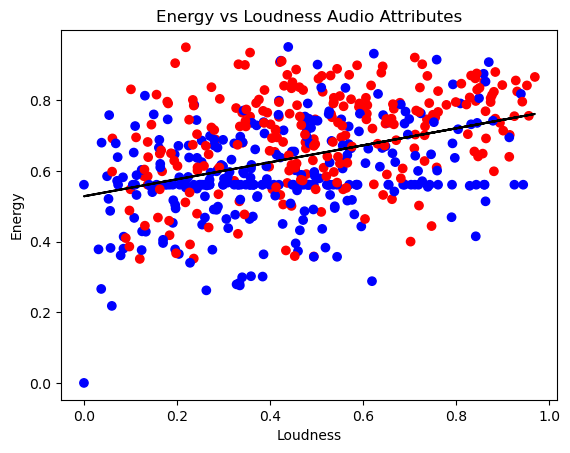

In [16]:
"""
    Scatterplot showing the correlation between 
"""

import matplotlib.pyplot as plt

df = pd.read_csv('Nov27_Final_Dataset.csv')

# establish x and y axis and label them
x = df['valence']
y = df['danceability']
plt.title("Energy vs Loudness Audio Attributes")
plt.xlabel("Loudness")
plt.ylabel("Energy")

# color code instances based on popular or not
is_popular = df['popular']
colors = np.where(is_popular, 'red', 'blue')

# scatter points based on x and y
plt.scatter(x, y, c=colors)

# establish a line of best fit
slope, intercept = np.polyfit(x, y, 1)
plt.plot(x, slope * x + intercept, color='black', label='Line of best fit')

plt.show()

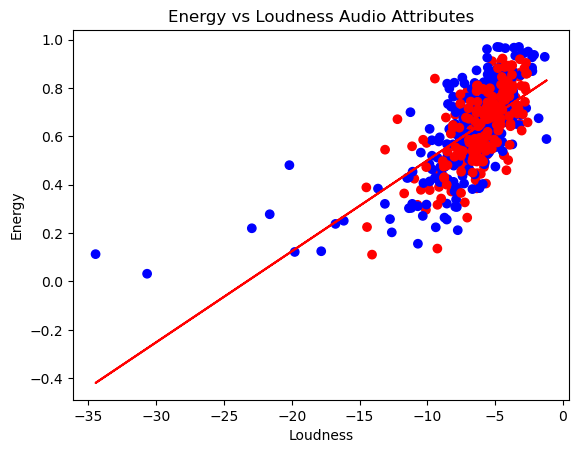

In [15]:
"""
    Scatterplot showing the correlation between energy and loudness attributes
"""

import matplotlib.pyplot as plt

df = pd.read_csv('Nov27_Final_Dataset.csv')

# establish x and y axis and label them
x = df['loudness']
y = df['energy']
plt.title("Energy vs Loudness Audio Attributes")
plt.xlabel("Loudness")
plt.ylabel("Energy")

# color code instances based on popular or not
is_popular = df['popular']
colors = np.where(is_popular, 'red', 'blue')

# scatter points based on x and y
plt.scatter(x, y, c=colors)

# establish a line of best fit
slope, intercept = np.polyfit(x, y, 1)
plt.plot(x, slope * x + intercept, color='red', label='Line of best fit')

plt.show()

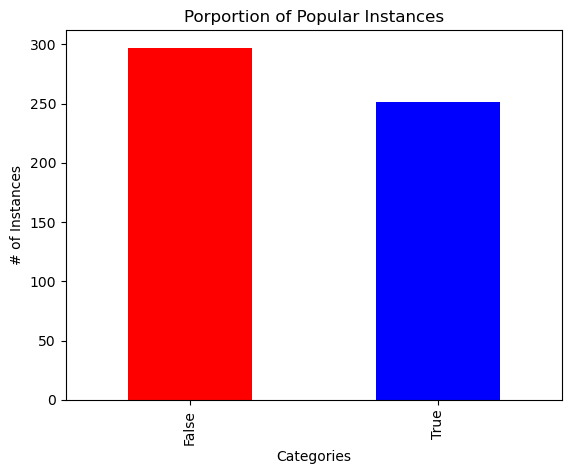

In [17]:
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('Nov27_Final_Dataset.csv')

is_popular = df['popular']

fig, ax = plt.subplots()

counts = is_popular.value_counts()

counts.plot(kind='bar', color=['red', 'blue'], ax=ax)

# Add labels, title, and legend
ax.set_xlabel('Categories')
ax.set_ylabel('# of Instances')
ax.set_title('Porportion of Popular Instances')

# Show the plot
plt.show()

Text(0.5, 1.0, 'Box Plot of Values for True and False')

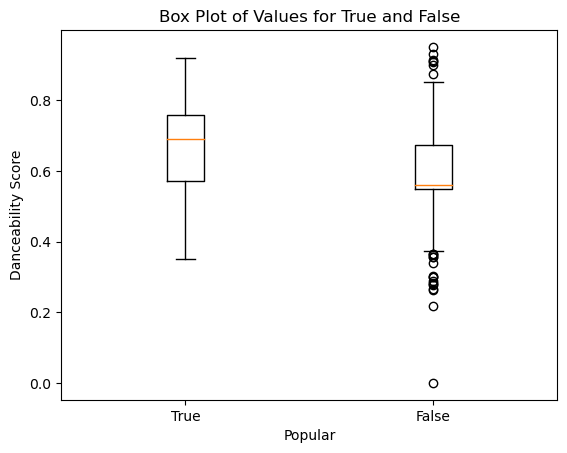

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

"""
    Box plots identifying the distribution of danceability values for popular and not popular songs
"""

df = pd.read_csv('Nov_11_Cleaned_Dataset.csv')

popular = df.loc[df['popular'] == True]
popular = popular['danceability']                # popular songs have higher danceability and valence on average, very slightly higher acousticness
not_popular = df.loc[df['popular'] == False]
not_popular = not_popular['danceability']

# Create a box plot
fig, ax = plt.subplots()
ax.boxplot([popular, not_popular], labels=['True', 'False'])

# Add labels and title
ax.set_xlabel('Popular')
ax.set_ylabel('Danceability Score')
ax.set_title('Box Plot of Values for True and False')

# # Show the plot
# plt.show()
